# data mining project2

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import sklearn as skl
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [3]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv('Dataset.csv')

first we get some basic information about data and recognize what are constraints or requiremnts

In [5]:
df.head()

,Unnamed: 0,Date,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,...,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after
0,0,12/1/2008,Station 2,13.4,22.9,0.6,NaN,NaN,W,44.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,1,12/2/2008,Station 2,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2,12/3/2008,Station 2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,3,12/4/2008,Station 2,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,4,12/5/2008,Station 2,17.5,32.3,1.0,NaN,NaN,W,41.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
del df['Unnamed: 0']

In [8]:
df.shape

(145460, 23)

In [9]:
df.describe()

,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Air Velocity,Air Velocity at 9 AM,Air Velocity at 3 PM,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          145460 non-null  object 
 1   Weather Station               145460 non-null  object 
 2   Minimum Temperature           143975 non-null  float64
 3   Maximum Temperature           144199 non-null  float64
 4   Rainfall                      142199 non-null  float64
 5   Evaporation                   82670 non-null   float64
 6   Sunshine                      75625 non-null   float64
 7   Gust Trajectory               135134 non-null  object 
 8   Air Velocity                  135197 non-null  float64
 9   Gust Trajectory at  9 AM      134894 non-null  object 
 10  Gust Trajectory at  3 PM      141232 non-null  object 
 11  Air Velocity at  9 AM         143693 non-null  float64
 12  Air Velocity at  3 PM         142398 non-nul

In [11]:
df.isnull().sum()

Date                                0
Weather Station                     0
Minimum Temperature              1485
Maximum Temperature              1261
Rainfall                         3261
Evaporation                     62790
Sunshine                        69835
Gust Trajectory                 10326
Air Velocity                    10263
Gust Trajectory at  9 AM        10566
Gust Trajectory at  3 PM         4228
Air Velocity at  9 AM            1767
Air Velocity at  3 PM            3062
Moisture Level at 9 AM           2654
Moisture Level at 3 PM           4507
Atmospheric Pressure at 9 AM    15065
Atmospheric Pressure at 3 PM    15028
Cloudiness at 9 AM              55888
Cloudiness at 3 PM              59358
Recorded Temperature at 9 AM     1767
Recorded Temperature at 3 PM     3609
Rain that day                    3261
Rain the day after               3267
dtype: int64

In [12]:
droped_df = df.dropna()
droped_df.reset_index(drop=True, inplace=True)

for analysing features to find out wich features are important to keep them and which features are removable 

In [13]:
droped_df.shape

(56420, 23)

finding not numerical features

In [14]:
droped_df.select_dtypes(include = 'object')

,Date,Weather Station,Gust Trajectory,Gust Trajectory at 9 AM,Gust Trajectory at 3 PM,Rain that day,Rain the day after
0,1/1/2009,Station 10,SSW,ENE,SW,No,No
1,1/2/2009,Station 10,S,SSE,SSE,No,No
2,1/4/2009,Station 10,NNE,NNE,NNW,No,No
3,1/5/2009,Station 10,WNW,WNW,WSW,No,No
4,1/6/2009,Station 10,WNW,NW,WNW,No,No
...,...,...,...,...,...,...,...
56415,6/20/2017,Station 13,ENE,SE,NE,No,No
56416,6/21/2017,Station 13,E,SE,SE,No,No
56417,6/22/2017,Station 13,E,E,W,No,No
56418,6/23/2017,Station 13,ESE,SE,NNW,No,No


In [15]:
droped_df.select_dtypes(include = 'object').nunique().sum

<bound method Series.sum of Date                        3416
Weather Station               26
Gust Trajectory               16
Gust Trajectory at  9 AM      16
Gust Trajectory at  3 PM      16
Rain that day                  2
Rain the day after             2
dtype: int64>

features with (yes and no) domain usually convert to 0 and 1 
and decided to convert date to numerical by seperat it to its day month and year
other features because dont have any order converted by one-hot encoding

In [16]:
droped_df['Date'] = pd.to_datetime(droped_df['Date'])
droped_df['year'] = droped_df['Date'].dt.year
droped_df['month'] = droped_df['Date'].dt.month
droped_df['day'] = droped_df['Date'].dt.day

/tmp/ipykernel_21198/2645226653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  droped_df['Date'] = pd.to_datetime(droped_df['Date'])
/tmp/ipykernel_21198/2645226653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  droped_df['year'] = droped_df['Date'].dt.year
/tmp/ipykernel_21198/2645226653.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [17]:
droped_df['Rain that day'] = LabelEncoder().fit_transform(droped_df['Rain that day'])
droped_df['Rain the day after'] = LabelEncoder().fit_transform(droped_df['Rain the day after'])

/tmp/ipykernel_21198/3707480984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  droped_df['Rain that day'] = LabelEncoder().fit_transform(droped_df['Rain that day'])
/tmp/ipykernel_21198/3707480984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  droped_df['Rain the day after'] = LabelEncoder().fit_transform(droped_df['Rain the day after'])


Weather Station	Gust Trajectory	Gust Trajectory at 9 AM	Gust Trajectory at 3 PM are categorical features 

In [18]:
def hotencode(name,droped_df):
    encoder = OneHotEncoder(sparse=False)
    add = encoder.fit_transform(droped_df[[name]])
    add_df = pd.DataFrame(add, columns=encoder.get_feature_names_out([name]))
    droped_df = pd.concat([droped_df, add_df], axis=1)
    return droped_df

In [19]:
droped_df = hotencode('Gust Trajectory',droped_df)

/home/alireza/miniconda3/envs/template/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [20]:
droped_df = hotencode('Weather Station',droped_df)

/home/alireza/miniconda3/envs/template/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [21]:
droped_df = hotencode('Gust Trajectory at  9 AM',droped_df)

/home/alireza/miniconda3/envs/template/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [22]:

droped_df = hotencode('Gust Trajectory at  3 PM',droped_df)

/home/alireza/miniconda3/envs/template/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
droped_df

,Date,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,...,Gust Trajectory at 3 PM_NNW,Gust Trajectory at 3 PM_NW,Gust Trajectory at 3 PM_S,Gust Trajectory at 3 PM_SE,Gust Trajectory at 3 PM_SSE,Gust Trajectory at 3 PM_SSW,Gust Trajectory at 3 PM_SW,Gust Trajectory at 3 PM_W,Gust Trajectory at 3 PM_WNW,Gust Trajectory at 3 PM_WSW
0,2009-01-01,Station 10,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2009-01-02,Station 10,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2009-01-04,Station 10,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2009-01-05,Station 10,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2009-01-06,Station 10,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,2017-06-20,Station 13,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56416,2017-06-21,Station 13,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
56417,2017-06-22,Station 13,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
56418,2017-06-23,Station 13,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
numeric_df = droped_df.select_dtypes(include='number')
corr = numeric_df.corr()['Rain the day after']

In [25]:
n = corr.shape[0]
n

95

because when I checked 0.5 and -0.5 I got just one feature I pick 0.3 and I think 5 features is enough

In [26]:
corr[corr>0.3]


Moisture Level at 3 PM    0.455358
Cloudiness at 9 AM        0.323972
Cloudiness at 3 PM        0.388574
Rain that day             0.309098
Rain the day after        1.000000
Name: Rain the day after, dtype: float64

In [27]:
corr[corr<-0.3]

Sunshine   -0.453407
Name: Rain the day after, dtype: float64

so we deside to select features with higher corr than |0.3| and other features are not helpful
now I want to undrestand the correlation of these five features with eachother

In [28]:
related_features = list[corr[corr<-0.3],corr[corr>0.3]]
related_features

list[Sunshine   -0.453407
Name: Rain the day after, dtype: float64, Moisture Level at 3 PM    0.455358
Cloudiness at 9 AM        0.323972
Cloudiness at 3 PM        0.388574
Rain that day             0.309098
Rain the day after        1.000000
Name: Rain the day after, dtype: float64]

In [29]:
heatmap_matrix = droped_df[['Moisture Level at 3 PM','Cloudiness at 9 AM','Cloudiness at 3 PM','Rain that day','Sunshine']].corr()
heatmap_matrix

,Moisture Level at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Rain that day,Sunshine
Moisture Level at 3 PM,1.000000,0.509223,0.510996,0.385440,-0.629299
Cloudiness at 9 AM,0.509223,1.000000,0.614380,0.297794,-0.677939
Cloudiness at 3 PM,0.510996,0.614380,1.000000,0.272034,-0.702022
Rain that day,0.385440,0.297794,0.272034,1.000000,-0.328904
Sunshine,-0.629299,-0.677939,-0.702022,-0.328904,1.000000


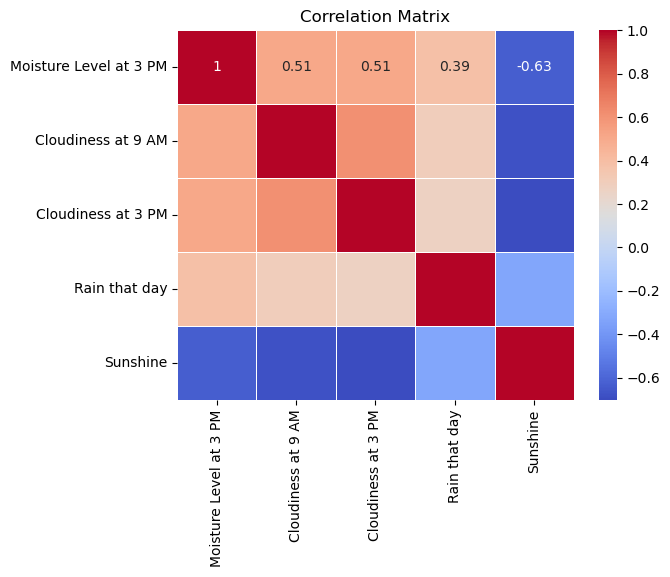

In [30]:
sns.heatmap(heatmap_matrix,annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


we can delete one of the features that their pair has high correlation but here our highest correlation is less than 0.7 and I decide to keep it

In [31]:
selected_df = df[['Moisture Level at 3 PM','Cloudiness at 9 AM','Cloudiness at 3 PM','Rain that day','Sunshine','Rain the day after']]
selected_df2 = df[['Moisture Level at 3 PM','Cloudiness at 9 AM','Cloudiness at 3 PM','Rain that day','Sunshine','Rain the day after']]
selected_df2.isnull().sum()

Moisture Level at 3 PM     4507
Cloudiness at 9 AM        55888
Cloudiness at 3 PM        59358
Rain that day              3261
Sunshine                  69835
Rain the day after         3267
dtype: int64

In [32]:
selected_df2.dropna(subset=['Rain that day','Rain the day after'],inplace=True)
selected_df2.isnull().sum()

/tmp/ipykernel_21198/3690720098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df2.dropna(subset=['Rain that day','Rain the day after'],inplace=True)


Moisture Level at 3 PM     3501
Cloudiness at 9 AM        52625
Cloudiness at 3 PM        56094
Rain that day                 0
Sunshine                  66805
Rain the day after            0
dtype: int64

In [33]:
selected_df.dropna(subset=['Rain that day','Rain the day after'],inplace=True)
selected_df.isnull().sum()

/tmp/ipykernel_21198/1063681102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.dropna(subset=['Rain that day','Rain the day after'],inplace=True)


Moisture Level at 3 PM     3501
Cloudiness at 9 AM        52625
Cloudiness at 3 PM        56094
Rain that day                 0
Sunshine                  66805
Rain the day after            0
dtype: int64

In [34]:
selected_df['Rain that day'] = LabelEncoder().fit_transform(selected_df['Rain that day'])
selected_df['Rain the day after'] = LabelEncoder().fit_transform(selected_df['Rain the day after'])

/tmp/ipykernel_21198/2562851646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['Rain that day'] = LabelEncoder().fit_transform(selected_df['Rain that day'])
/tmp/ipykernel_21198/2562851646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['Rain the day after'] = LabelEncoder().fit_transform(selected_df['Rain the day after'])


In [35]:
selected_df2['Rain that day'] = LabelEncoder().fit_transform(selected_df2['Rain that day'])
selected_df2['Rain the day after'] = LabelEncoder().fit_transform(selected_df2['Rain the day after'])

/tmp/ipykernel_21198/393801483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df2['Rain that day'] = LabelEncoder().fit_transform(selected_df2['Rain that day'])
/tmp/ipykernel_21198/393801483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df2['Rain the day after'] = LabelEncoder().fit_transform(selected_df2['Rain the day after'])


In [36]:
selected_df2

,Moisture Level at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Rain that day,Sunshine,Rain the day after
0,22.0,8.0,NaN,0,NaN,0
1,25.0,NaN,NaN,0,NaN,0
2,30.0,NaN,2.0,0,NaN,0
3,16.0,NaN,NaN,0,NaN,0
4,33.0,7.0,8.0,0,NaN,0
...,...,...,...,...,...,...
145454,27.0,NaN,NaN,0,NaN,0
145455,24.0,NaN,NaN,0,NaN,0
145456,21.0,NaN,NaN,0,NaN,0
145457,24.0,NaN,NaN,0,NaN,0


In [37]:
selected_df2_lessrows = selected_df.copy()

In [38]:
selected_df2_lessrows.dropna(inplace=True)
selected_df2_lessrows.shape

(64195, 6)

fill null values 
consider table of fetaures correlation with each other and not target 
each feature that has more than |0.6| corr with the other will fill from that feature

In [39]:
selected_df.isnull().sum()

Moisture Level at 3 PM     3501
Cloudiness at 9 AM        52625
Cloudiness at 3 PM        56094
Rain that day                 0
Sunshine                  66805
Rain the day after            0
dtype: int64

Cloudiness at 3 and Cloudiness at 9 will fill by using eachother

think this way that fill null values like this is not true

I do this with my personal recegnition from data(weak domain info)

In [40]:
diff = selected_df['Cloudiness at 9 AM'].mean() - selected_df['Cloudiness at 3 PM'].mean()
diff

-0.06808941560937942

In [41]:
missing_feature1 = selected_df['Cloudiness at 9 AM'].isnull()
missing_feature2 = selected_df['Cloudiness at 3 PM'].isnull()
selected_df.loc[missing_feature1, 'Cloudiness at 9 AM'] = selected_df.loc[missing_feature1, 'Cloudiness at 3 PM'] - diff
selected_df.loc[missing_feature2, 'Cloudiness at 3 PM'] = selected_df.loc[missing_feature2, 'Cloudiness at 9 AM'] + diff

In [42]:
selected_df.isnull().sum()

Moisture Level at 3 PM     3501
Cloudiness at 9 AM        48761
Cloudiness at 3 PM        48761
Rain that day                 0
Sunshine                  66805
Rain the day after            0
dtype: int64

In [43]:
corr2 = numeric_df.corr()['Sunshine']
print(corr2[corr2>0.6],corr2[corr2<-0.6] )

Sunshine    1.0
Name: Sunshine, dtype: float64 Moisture Level at 3 PM   -0.629299
Cloudiness at 9 AM       -0.677939
Cloudiness at 3 PM       -0.702022
Name: Sunshine, dtype: float64


In [44]:
diff2 = selected_df['Moisture Level at 3 PM'].mean() - selected_df['Sunshine'].mean()
diff2

43.81874848590725

I do this with my personal recegnition from data(weak domain info)

In [45]:
missing_feature1 = selected_df['Sunshine'].isnull()
selected_df.loc[missing_feature1, 'Sunshine'] = selected_df.loc[missing_feature1, 'Moisture Level at 3 PM'] - diff2
selected_df.isnull().sum()

Moisture Level at 3 PM     3501
Cloudiness at 9 AM        48761
Cloudiness at 3 PM        48761
Rain that day                 0
Sunshine                   2937
Rain the day after            0
dtype: int64

but also by setting features like both moistures and sunshine as target we could train models like regression to predict missing values but I guess it was not point of project and it was a little long task

In [46]:
selected_df.dropna(inplace=True)
selected_df.shape

/tmp/ipykernel_21198/3387560761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.dropna(inplace=True)


(89567, 6)

/home/alireza/miniconda3/envs/template/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/alireza/miniconda3/envs/template/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/alireza/miniconda3/envs/template/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/alireza/miniconda3/envs/template/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

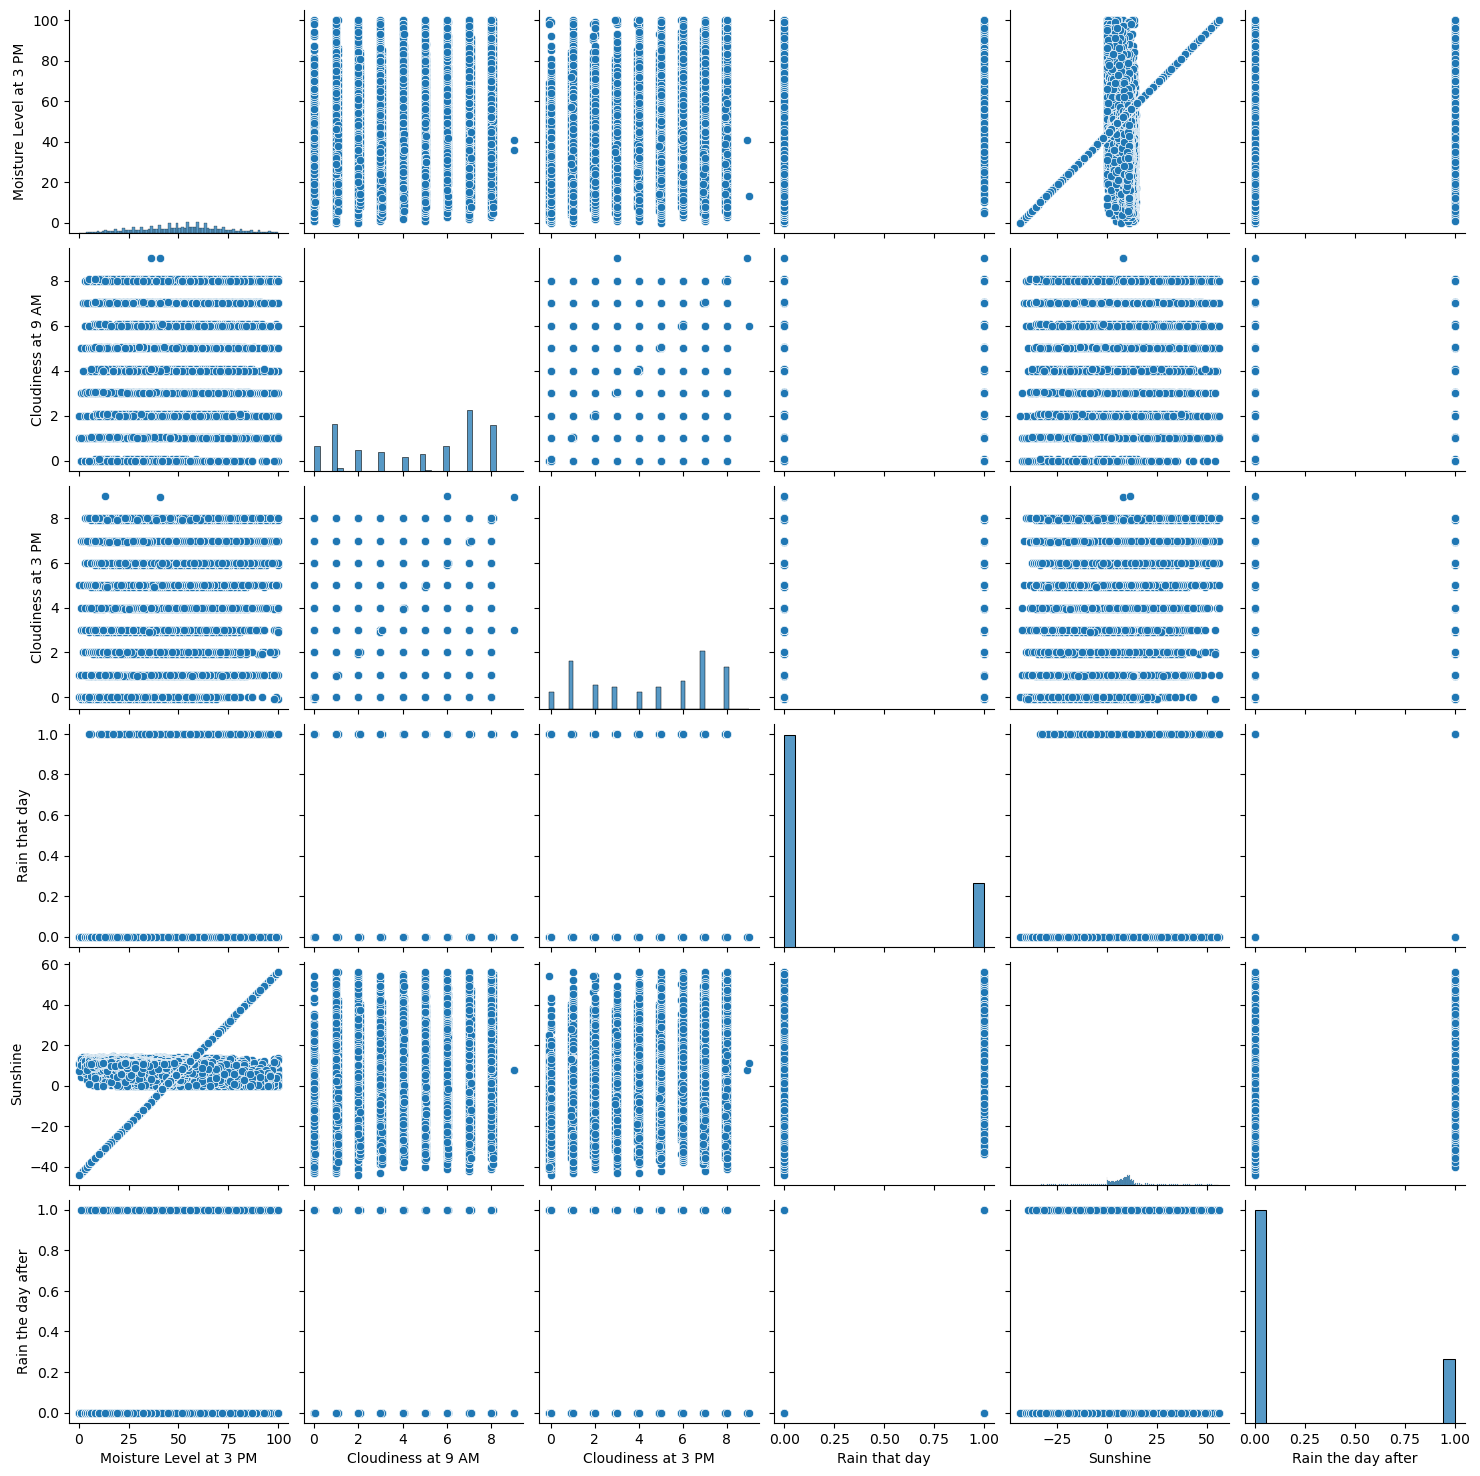

In [47]:
sns.pairplot(selected_df)

In [48]:
selected_df2.isnull().sum()

Moisture Level at 3 PM     3501
Cloudiness at 9 AM        52625
Cloudiness at 3 PM        56094
Rain that day                 0
Sunshine                  66805
Rain the day after            0
dtype: int64

In [49]:
sunshine_m = selected_df2['Sunshine'].mean()
selected_df2['Sunshine'].fillna(sunshine_m,inplace=True)

/tmp/ipykernel_21198/1587212828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df2['Sunshine'].fillna(sunshine_m,inplace=True)


In [50]:
selected_df2.dropna(inplace=True)

/tmp/ipykernel_21198/2066002234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df2.dropna(inplace=True)


In [51]:
selected_df2.shape

(80555, 6)

/home/alireza/miniconda3/envs/template/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/alireza/miniconda3/envs/template/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/alireza/miniconda3/envs/template/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/alireza/miniconda3/envs/template/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

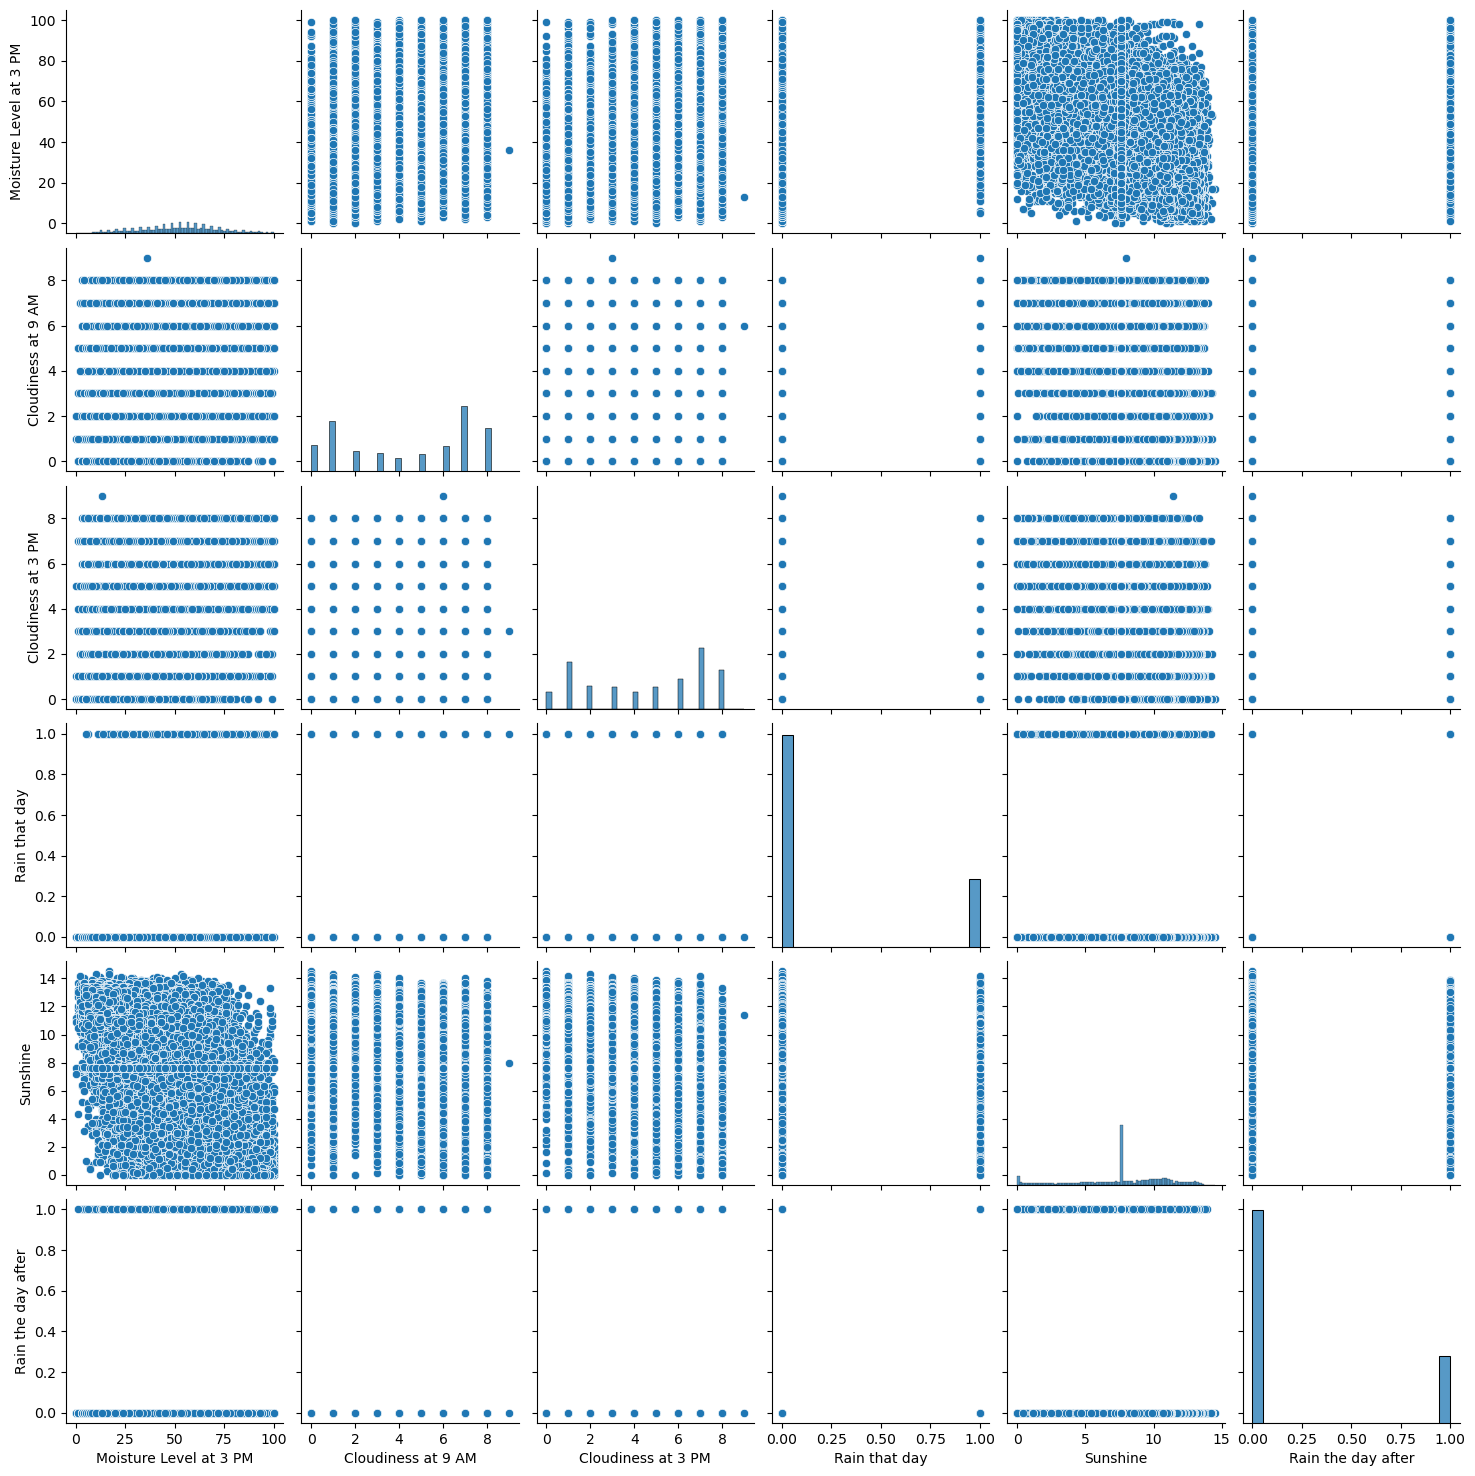

In [52]:
sns.pairplot(selected_df2)

after seeing this extreme and abnormal changes I think our filling was wrong and i decided to make selected_df2 in other way

In [53]:
selected_df2.dropna().shape

(80555, 6)

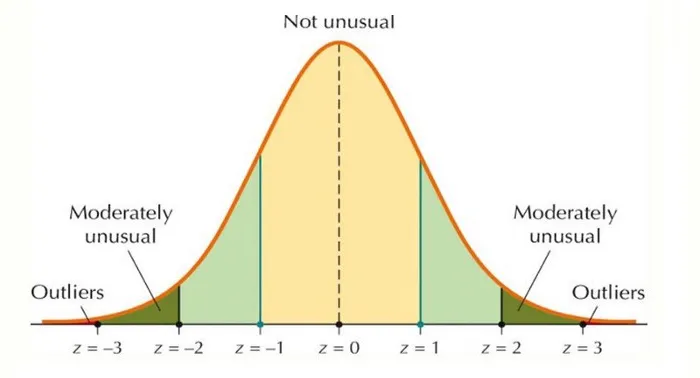

by using z=score we can detect outliers of each feature.we are calculating for all values of each feature and consider they are outlier or not

In [54]:
selected_df2

,Moisture Level at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Rain that day,Sunshine,Rain the day after
4,33.0,7.0,8.0,0,7.63054,0
11,91.0,8.0,8.0,1,7.63054,1
12,93.0,8.0,8.0,1,7.63054,1
16,82.0,8.0,1.0,0,7.63054,1
17,65.0,8.0,1.0,1,7.63054,1
...,...,...,...,...,...,...
145428,36.0,7.0,1.0,0,7.63054,0
145429,27.0,4.0,7.0,0,7.63054,0
145432,34.0,8.0,8.0,0,7.63054,0
145433,32.0,8.0,4.0,0,7.63054,0


In [55]:
z_scores = stats.zscore(selected_df2)
z_scores

,Moisture Level at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Rain that day,Sunshine,Rain the day after
4,-0.894294,0.888295,1.287540,-0.564682,-0.00117,-0.560227
11,1.889836,1.236200,1.287540,1.770908,-0.00117,1.784992
12,1.985840,1.236200,1.287540,1.770908,-0.00117,1.784992
16,1.457816,1.236200,-1.294339,-0.564682,-0.00117,1.784992
17,0.641778,1.236200,-1.294339,1.770908,-0.00117,1.784992
...,...,...,...,...,...,...
145428,-0.750287,0.888295,-1.294339,-0.564682,-0.00117,-0.560227
145429,-1.182307,-0.155423,0.918700,-0.564682,-0.00117,-0.560227
145432,-0.846292,1.236200,1.287540,-0.564682,-0.00117,-0.560227
145433,-0.942296,1.236200,-0.187820,-0.564682,-0.00117,-0.560227


In [56]:
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
selected_df2 = selected_df2[filtered_entries]
selected_df2.shape

(80555, 6)

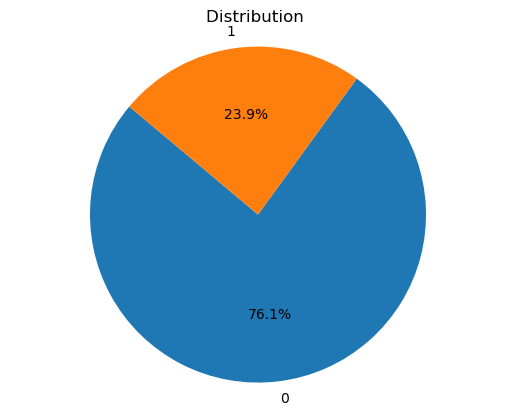

In [57]:
plt.pie(selected_df2['Rain the day after'].value_counts(), labels=selected_df2['Rain the day after'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution ')
plt.axis('equal')  
plt.show()

/home/alireza/miniconda3/envs/template/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


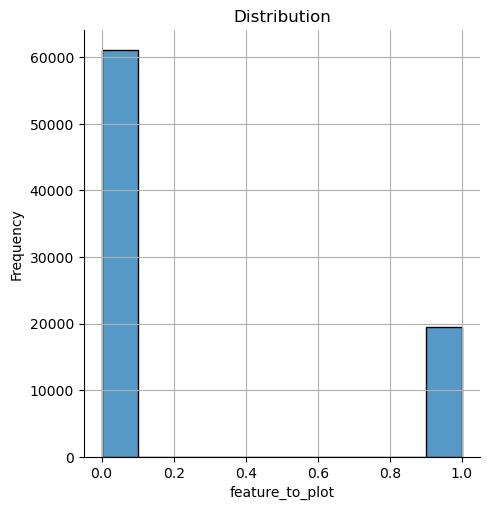

In [58]:
# Plot distribution plot of the specified feature
sns.displot(selected_df2['Rain that day'], bins=10, kde=False)
plt.title('Distribution')
plt.xlabel('feature_to_plot')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

https://arxiv.org/abs/1608.06048
some ways of handling imbalance dataset choosed smote that its a kind of oversampling and randomly create samples similar the others in the minority class

In [59]:
sm = SMOTE(sampling_strategy='minority', random_state=42)
oversampled_X, oversampled_Y = sm.fit_resample(selected_df2.drop('Rain the day after', axis=1), selected_df2['Rain the day after'])


In [60]:
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

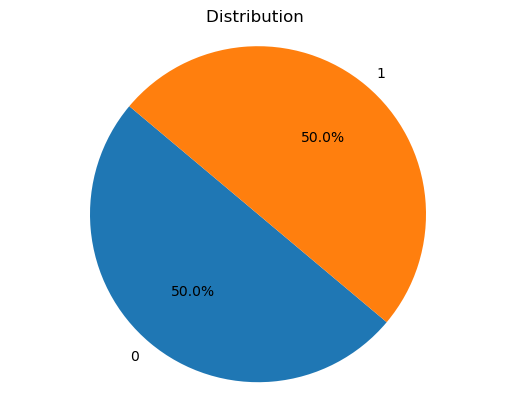

In [61]:
plt.pie(oversampled['Rain the day after'].value_counts(), labels=oversampled['Rain the day after'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution ')
plt.axis('equal')  
plt.show()

/home/alireza/miniconda3/envs/template/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/alireza/miniconda3/envs/template/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/alireza/miniconda3/envs/template/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/alireza/miniconda3/envs/template/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

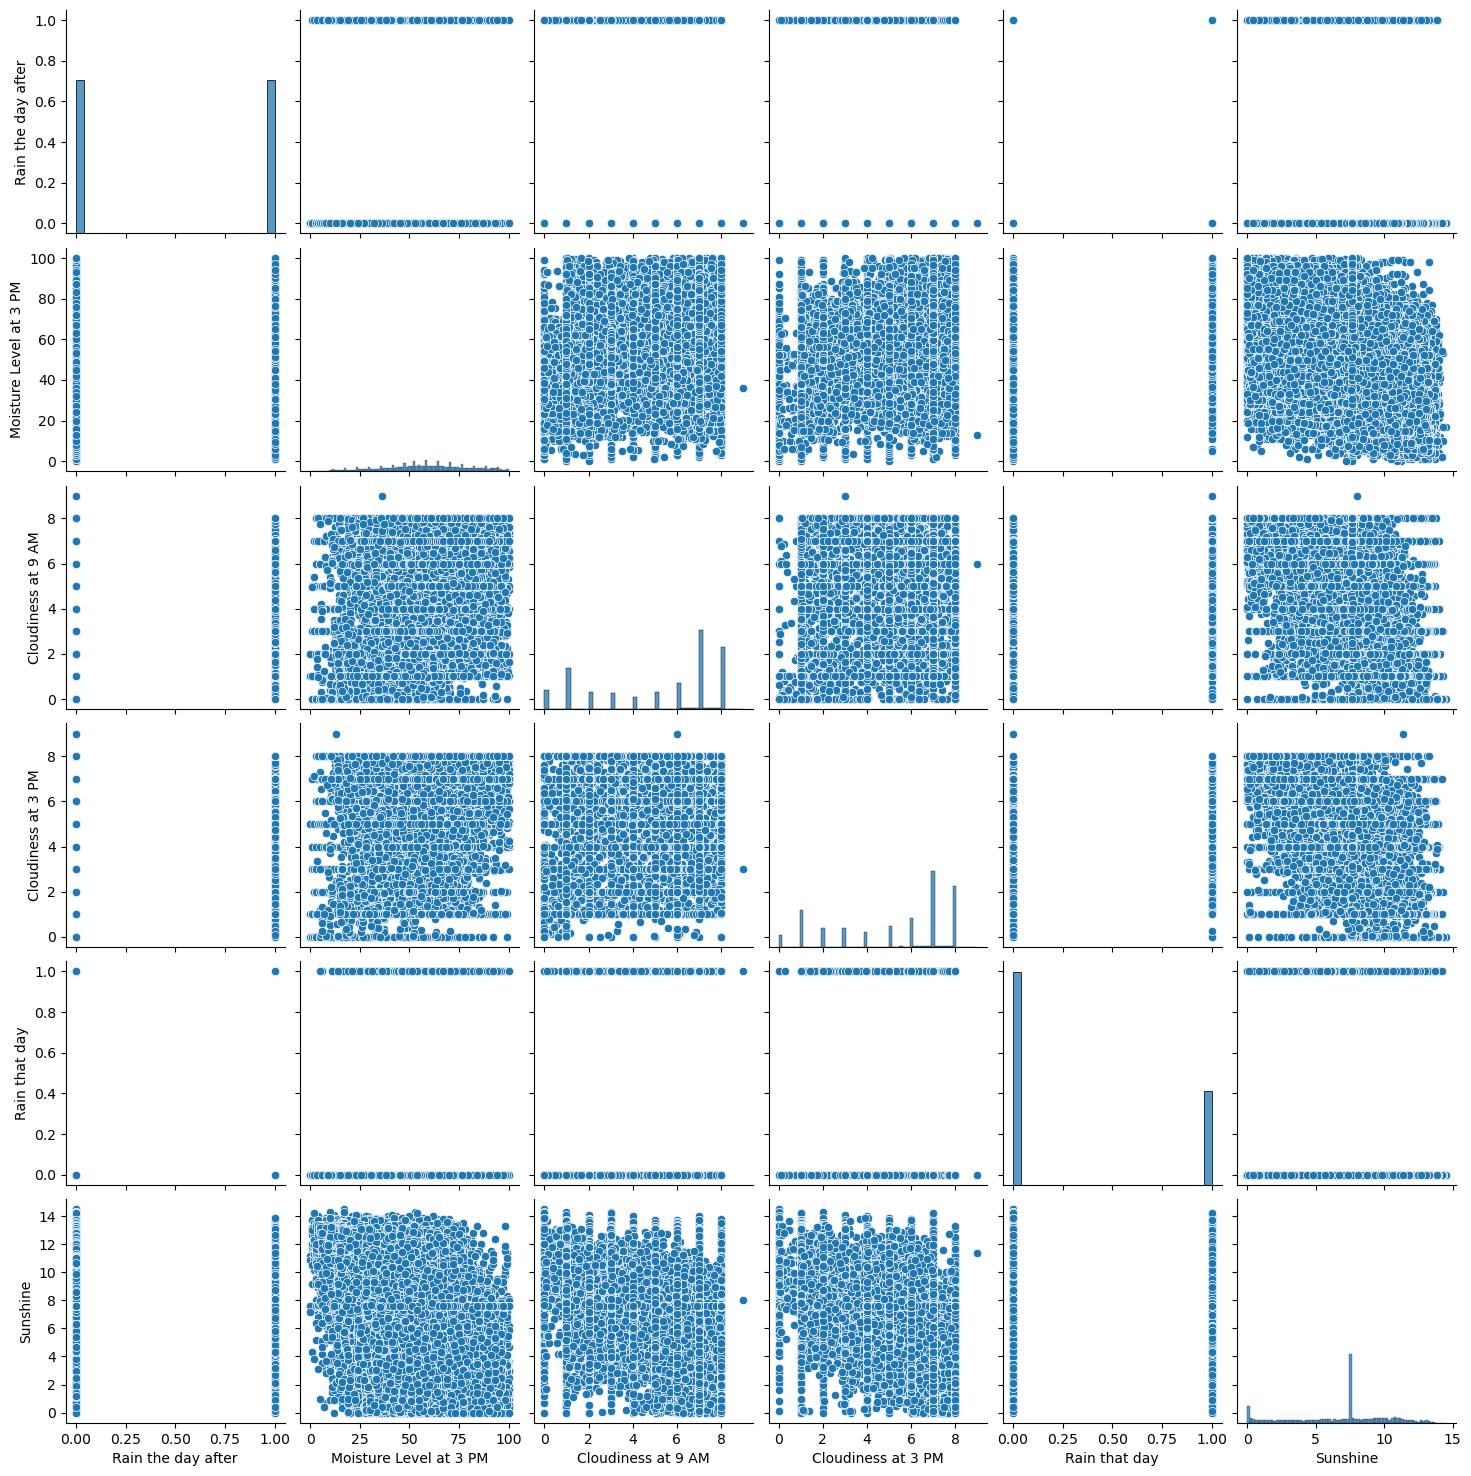

In [62]:
sns.pairplot(oversampled)

In [63]:
oversampled.columns

Index(['Rain the day after', 'Moisture Level at 3 PM', 'Cloudiness at 9 AM',
       'Cloudiness at 3 PM', 'Rain that day', 'Sunshine'],
      dtype='object')

## normalization

/home/alireza/miniconda3/envs/template/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/alireza/miniconda3/envs/template/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 600x600 with 0 Axes>

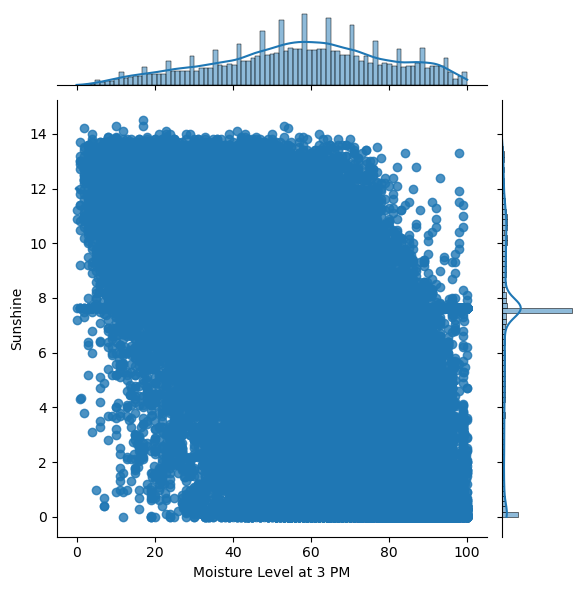

/home/alireza/miniconda3/envs/template/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/alireza/miniconda3/envs/template/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 600x600 with 0 Axes>

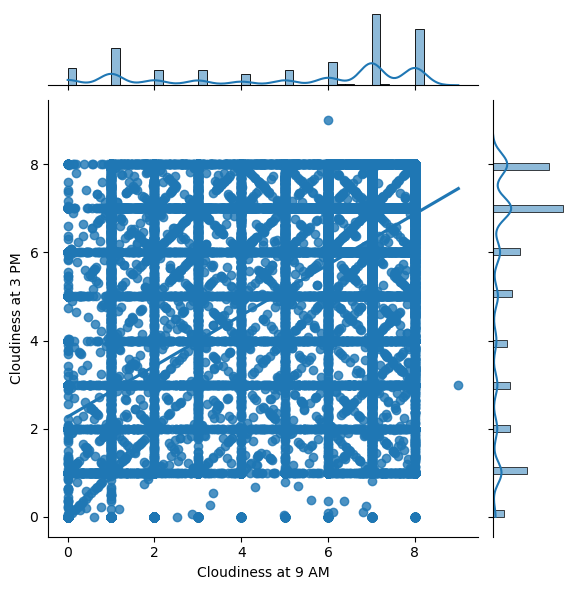

/home/alireza/miniconda3/envs/template/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x600 with 0 Axes>

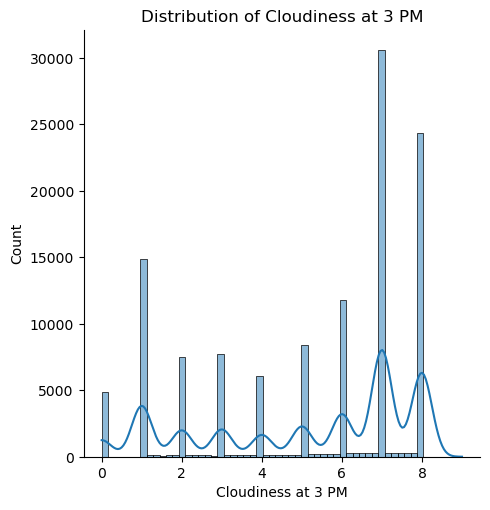

/home/alireza/miniconda3/envs/template/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x600 with 0 Axes>

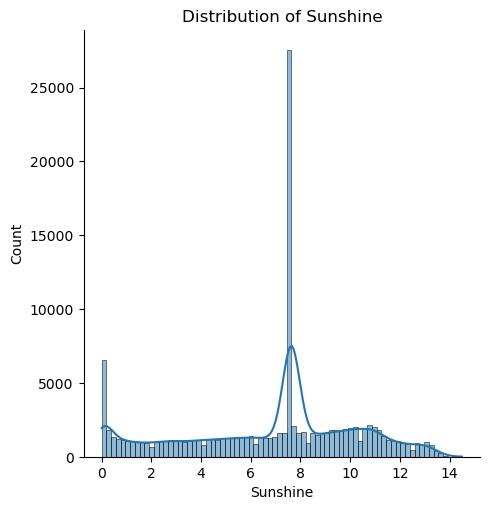

/home/alireza/miniconda3/envs/template/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x600 with 0 Axes>

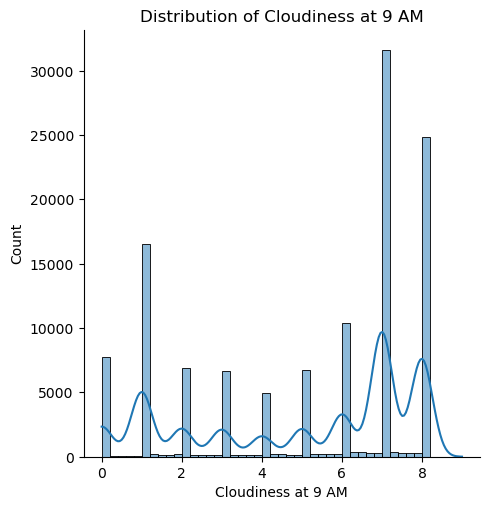

/home/alireza/miniconda3/envs/template/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x600 with 0 Axes>

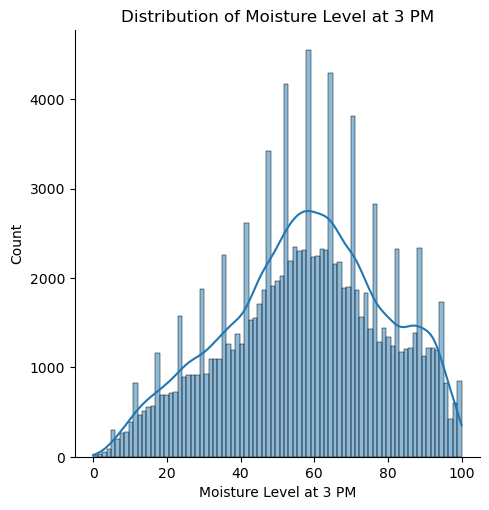

skew of Cloudiness at 9 AM: -0.5598468430299816
skew of Sunshine: -0.3919086053930058
skew of Cloudiness at 3 PM: -0.6107905141298858
skew of Moisture Level at 3 PM: -0.20830320221063853


In [64]:
plt.figure(figsize=(6, 6))
sns.jointplot(x='Moisture Level at 3 PM', y='Sunshine', data=oversampled, kind='reg')
plt.xlabel('Moisture Level at 3 PM')
plt.ylabel('Sunshine')
plt.show()

plt.figure(figsize=(6, 6))
sns.jointplot(x='Cloudiness at 9 AM', y='Cloudiness at 3 PM', data=oversampled, kind='reg')
plt.xlabel('Cloudiness at 9 AM')
plt.ylabel('Cloudiness at 3 PM')
plt.show()

plt.figure(figsize=(12, 6))
sns.displot(oversampled['Cloudiness at 3 PM'], kde=True)
plt.title('Distribution of Cloudiness at 3 PM')
plt.show()

plt.figure(figsize=(12, 6))
sns.displot(oversampled['Sunshine'], kde=True)
plt.title('Distribution of Sunshine')
plt.show()

plt.figure(figsize=(12, 6))
sns.displot(oversampled['Cloudiness at 9 AM'], kde=True)
plt.title('Distribution of Cloudiness at 9 AM')
plt.show()

plt.figure(figsize=(12, 6))
sns.displot(oversampled['Moisture Level at 3 PM'], kde=True)
plt.title('Distribution of Moisture Level at 3 PM')
plt.show()

print(f"skew of Cloudiness at 9 AM: {oversampled['Cloudiness at 9 AM'].skew()}")
print(f"skew of Sunshine: {oversampled['Sunshine'].skew()}")
print(f"skew of Cloudiness at 3 PM: {oversampled['Cloudiness at 3 PM'].skew()}")
print(f"skew of Moisture Level at 3 PM: {oversampled['Moisture Level at 3 PM'].skew()}")

we can normalize both cloudiness features but they arent extremly skewed and we can keep them
but code for normalizing a feature like rainfall that has zero values is like that:

In [65]:
#from scipy.stats import yeojohnson

#oversampled['Rainfall'], _ = yeojohnson(oversampled['Rainfall'] + 1)


#plt.figure(figsize=(12, 6))
#sns.displot(oversampled['Rainfall'], kde=True)
#plt.title('Distribution of Rainfall')
#plt.show()

decreased and now its ready to use 

usv and KNN are sensitive about distance but decision tree theoricaly not so did this normalization to get better results

# decision tree

In [66]:
X = oversampled.drop('Rain the day after', axis=1)
Y = oversampled['Rain the day after']

In [67]:
X_initial, X_test, y_initial, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [68]:
X_train, X_validation , y_train, y_validation  = train_test_split(X_initial, y_initial, test_size=0.1, random_state=42)

In [69]:
from sklearn.tree import DecisionTreeClassifier
for i in range(10):
    decision_tree = DecisionTreeClassifier(max_depth=10*(i+1))
    decision_tree.fit(X_train, y_train)
    print(f"for {10*(i+1)} \naccuracy on train {decision_tree.score(X_train, y_train)}")
    print(f"accuracy on train {decision_tree.score(X_validation, y_validation)}")

for 10 
accuracy on train 0.7789985162364508
accuracy on train 0.7694189602446483
for 20 
accuracy on train 0.8842890960368789
accuracy on train 0.7981651376146789
for 30 
accuracy on train 0.9406947637871083
accuracy on train 0.8039755351681958
for 40 
accuracy on train 0.9558721924588567
accuracy on train 0.8060142711518858
for 50 
accuracy on train 0.9626114238466853
accuracy on train 0.8072375127420999
for 60 
accuracy on train 0.9628719319507526
accuracy on train 0.8067278287461773
for 70 
accuracy on train 0.9628719319507526
accuracy on train 0.8078491335372069
for 80 
accuracy on train 0.9628719319507526
accuracy on train 0.8085626911314985
for 90 
accuracy on train 0.9628719319507526
accuracy on train 0.8074413863404689
for 100 
accuracy on train 0.9628719319507526
accuracy on train 0.8081549439347604


it seems that set max depth to 50 its ok and dont cause overfit and undefit

In [70]:
decision_tree = DecisionTreeClassifier(max_depth=50)
decision_tree.fit(X_initial, y_initial)

y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8114984709480122
Precision: 0.8138858898762561
Recall: 0.8044656049909703
F1 Score: 0.8091483300994922


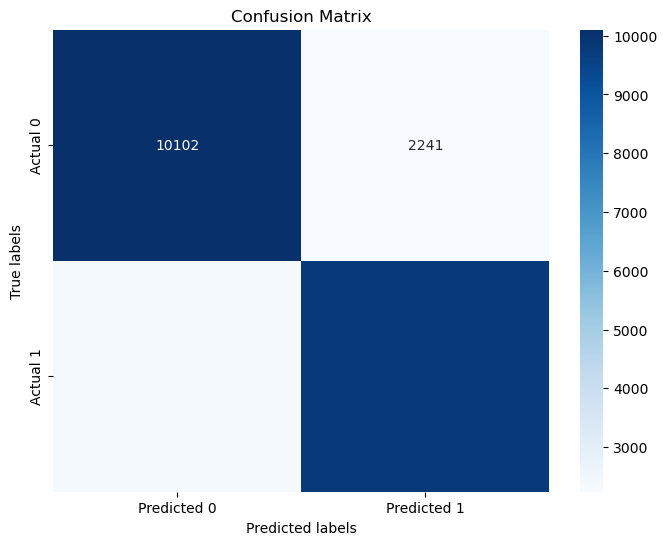

In [71]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

----------------------------------------------

# knn

In [72]:
X = oversampled.drop('Rain the day after', axis=1)
Y = oversampled['Rain the day after']
X_initial, X_test, y_initial, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_validation , y_train, y_validation  = train_test_split(X_initial, y_initial, test_size=0.1, random_state=42)

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
for i in range(10):
    knn = KNeighborsClassifier(n_neighbors = i+1)
    knn.fit(X_train, y_train)
    print(f"for {(i+1)} \naccuracy on train {knn.score(X_train, y_train)}")
    print(f"accuracy on train {knn.score(X_validation, y_validation)}")

for 1 
accuracy on train 0.9549320979963529
accuracy on train 0.8089704383282365
for 2 
accuracy on train 0.89442625921689
accuracy on train 0.7754332313965342
for 3 
accuracy on train 0.887098052985083
accuracy on train 0.8044852191641182
for 4 
accuracy on train 0.8680922878274757
accuracy on train 0.7940876656472987
for 5 
accuracy on train 0.8581023683584591
accuracy on train 0.8007135575942915
for 6 
accuracy on train 0.8502984516757467
accuracy on train 0.7936799184505606
for 7 
accuracy on train 0.8415091347733014
accuracy on train 0.7957186544342507
for 8 
accuracy on train 0.837952632830817
accuracy on train 0.7948012232415902
for 9 
accuracy on train 0.8317230912118158
accuracy on train 0.7928644240570846
for 10 
accuracy on train 0.8300694310729536
accuracy on train 0.7916411824668705


it seems that k = 3 could be appropriate not very time consuming and dont cuase underfit or overfit

checking does it need scale or not becuase scaling features does effects on knn model 

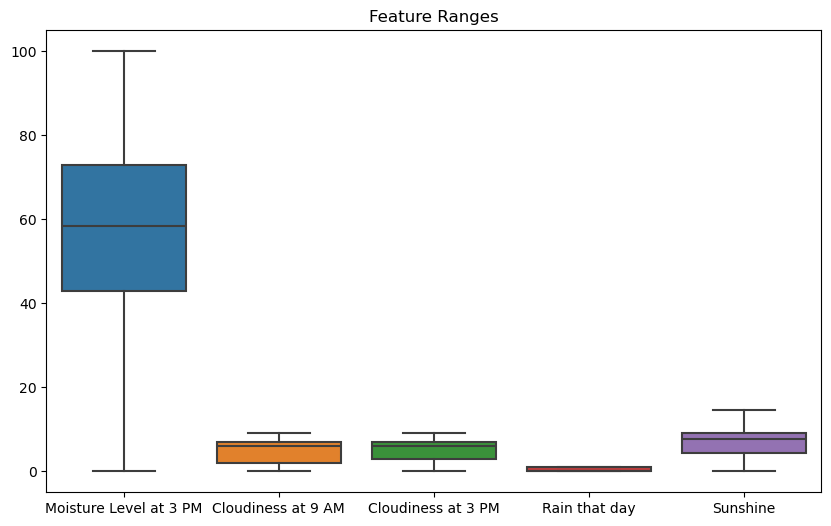

In [75]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X)
plt.title('Feature Ranges')
plt.show()

its better to scale beacuase of this difference

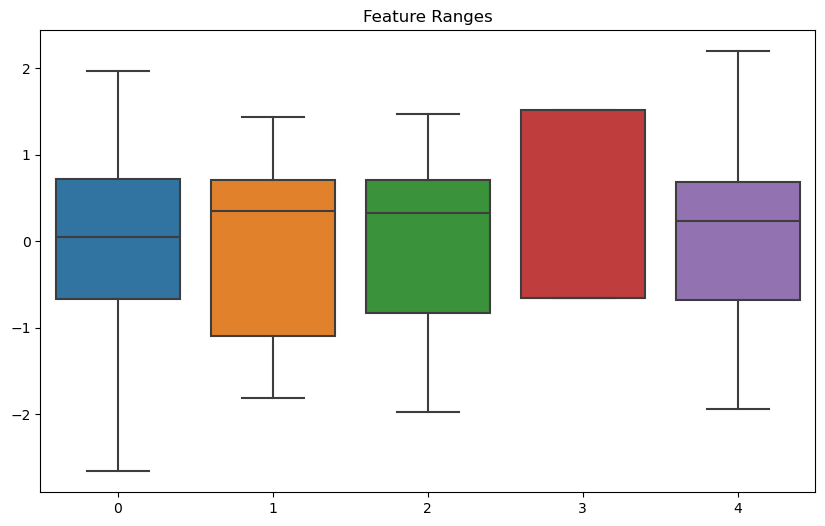

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_scaled)
plt.title('Feature Ranges')
plt.show()

and dimensions reduction will effect on knn model like 

In [77]:
from sklearn.decomposition import PCA

In [78]:
#pca = PCA(n_components=2)  # Reduce to 2 dimensions for simplicity, adjust as needed
#X_pca = pca.fit_transform(X_scaled)

In [79]:
X_initial, X_test, y_initial, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
X_train, X_validation , y_train, y_validation  = train_test_split(X_initial, y_initial, test_size=0.1, random_state=42)

In [80]:
X = oversampled.drop('Rain the day after', axis=1)
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled)
Y = oversampled['Rain the day after']
X_initial, X_test, y_initial, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)
X_train, X_validation , y_train, y_validation  = train_test_split(X_initial, y_initial, test_size=0.1, random_state=42)

In [81]:
for i in range(10):
    knn = KNeighborsClassifier(n_neighbors = i+1)
    knn.fit(X_train, y_train)
    print(f"for {(i+1)} \naccuracy on train {knn.score(X_train, y_train)}")
    print(f"accuracy on train {knn.score(X_validation, y_validation)}")

for 1 
accuracy on train 0.9521571203660705
accuracy on train 0.7176350662589195
for 2 
accuracy on train 0.8364462164029494
accuracy on train 0.7051987767584098
for 3 
accuracy on train 0.8424945349930343
accuracy on train 0.7365953109072375
for 4 
accuracy on train 0.8142917011179196
accuracy on train 0.7322120285423037
for 5 
accuracy on train 0.8135894618808686
accuracy on train 0.7385321100917431
for 6 
accuracy on train 0.7991029460068638
accuracy on train 0.7358817533129459
for 7 
accuracy on train 0.7977324468506836
accuracy on train 0.7423037716615698
for 8 
accuracy on train 0.7898265922142056
accuracy on train 0.7424057084607544
for 9 
accuracy on train 0.7898265922142056
accuracy on train 0.7472986748216106
for 10 
accuracy on train 0.7849562233120774
accuracy on train 0.7462793068297655


# not pca not dimention reduction:
for 1 
accuracy on train 0.9549320979963529
accuracy on validation 0.8089704383282365
for 2 
accuracy on train 0.89442625921689
accuracy on validation 0.7754332313965342
for 3 
accuracy on train 0.887098052985083
accuracy on validation 0.8044852191641182
for 4 
accuracy on train 0.8680922878274757
accuracy on validation 0.7940876656472987
for 5 
accuracy on train 0.8581023683584591
accuracy on validation 0.8007135575942915
# only pca
for 1 
accuracy on train 0.9521571203660705
accuracy on validation 0.7180428134556575
for 2 
accuracy on train 0.8364915221601785
accuracy on validation 0.7049949031600408
for 3 
accuracy on train 0.8424945349930343
accuracy on validation 0.7367991845056066
for 4 
accuracy on train 0.8143823126323778
accuracy on validation 0.7321100917431193
for 5 
accuracy on train 0.8136800733953267
accuracy on validation 0.7386340468909276
# only scale
for 1 
accuracy on train 0.9544110817882182
accuracy on validation 0.8019367991845056
for 2 
accuracy on train 0.8862598964763447
accuracy on validation 0.7679918450560652
for 3 
accuracy on train 0.8852178640600754
accuracy on validation 0.7942915392456676
for 4 
accuracy on train 0.8580230832833082
accuracy on validation 0.7851172273190622
for 5 
accuracy on train 0.852699656808889
accuracy on validation 0.791131498470948
# both pca and scale
for 1 
accuracy on train 0.9521571203660705
accuracy on validation 0.717940876656473
for 2 
accuracy on train 0.8364688692815639
accuracy on validation 0.7051987767584098
for 3 
accuracy on train 0.8425171878716488
accuracy on validation 0.736697247706422
for 4 
accuracy on train 0.8142803746786123
accuracy on validation 0.7322120285423037
for 5 
accuracy on train 0.813691399834634
accuracy on validation 0.7386340468909276

# conclusion 
reduction and scale ofcource effect on knn models reduction show itself when we have too many features and even outlier samples but in our data set they dont act very well and just use scale 
## k = 3 , using scale

In [82]:
X = oversampled.drop('Rain the day after', axis=1)
Y = oversampled['Rain the day after']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_initial, X_test, y_initial, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
X_train, X_validation , y_train, y_validation  = train_test_split(X_initial, y_initial, test_size=0.1, random_state=42)

In [83]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_initial, y_initial)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8014678899082569
Precision: 0.7917032309533307
Recall: 0.8146445575439173
F1 Score: 0.8030100740381115


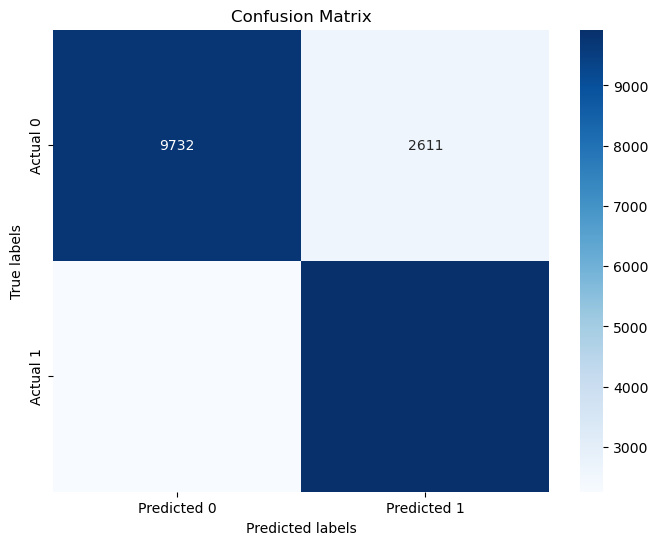

In [84]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

______________________________________________________________________________________

# svm

In [86]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X = oversampled.drop('Rain the day after', axis=1)
Y = oversampled['Rain the day after']
X_notuse , X_use, y_notuse, y_use = train_test_split(X, Y, test_size=0.12, random_state=42)
X_train , X_test, y_train, y_test = train_test_split(X_use, y_use, test_size=0.20, random_state=42)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear'],
    'gamma': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'class_weight': [None, 'balanced']
}

#svm = SVC()


#grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')


#grid_search.fit(X_train, y_train)


#best_params = grid_search.best_params_
#best_accuracy = grid_search.best_score_

#print("Best Parameters:", best_params)
#print("Best Accuracy:", best_accuracy)

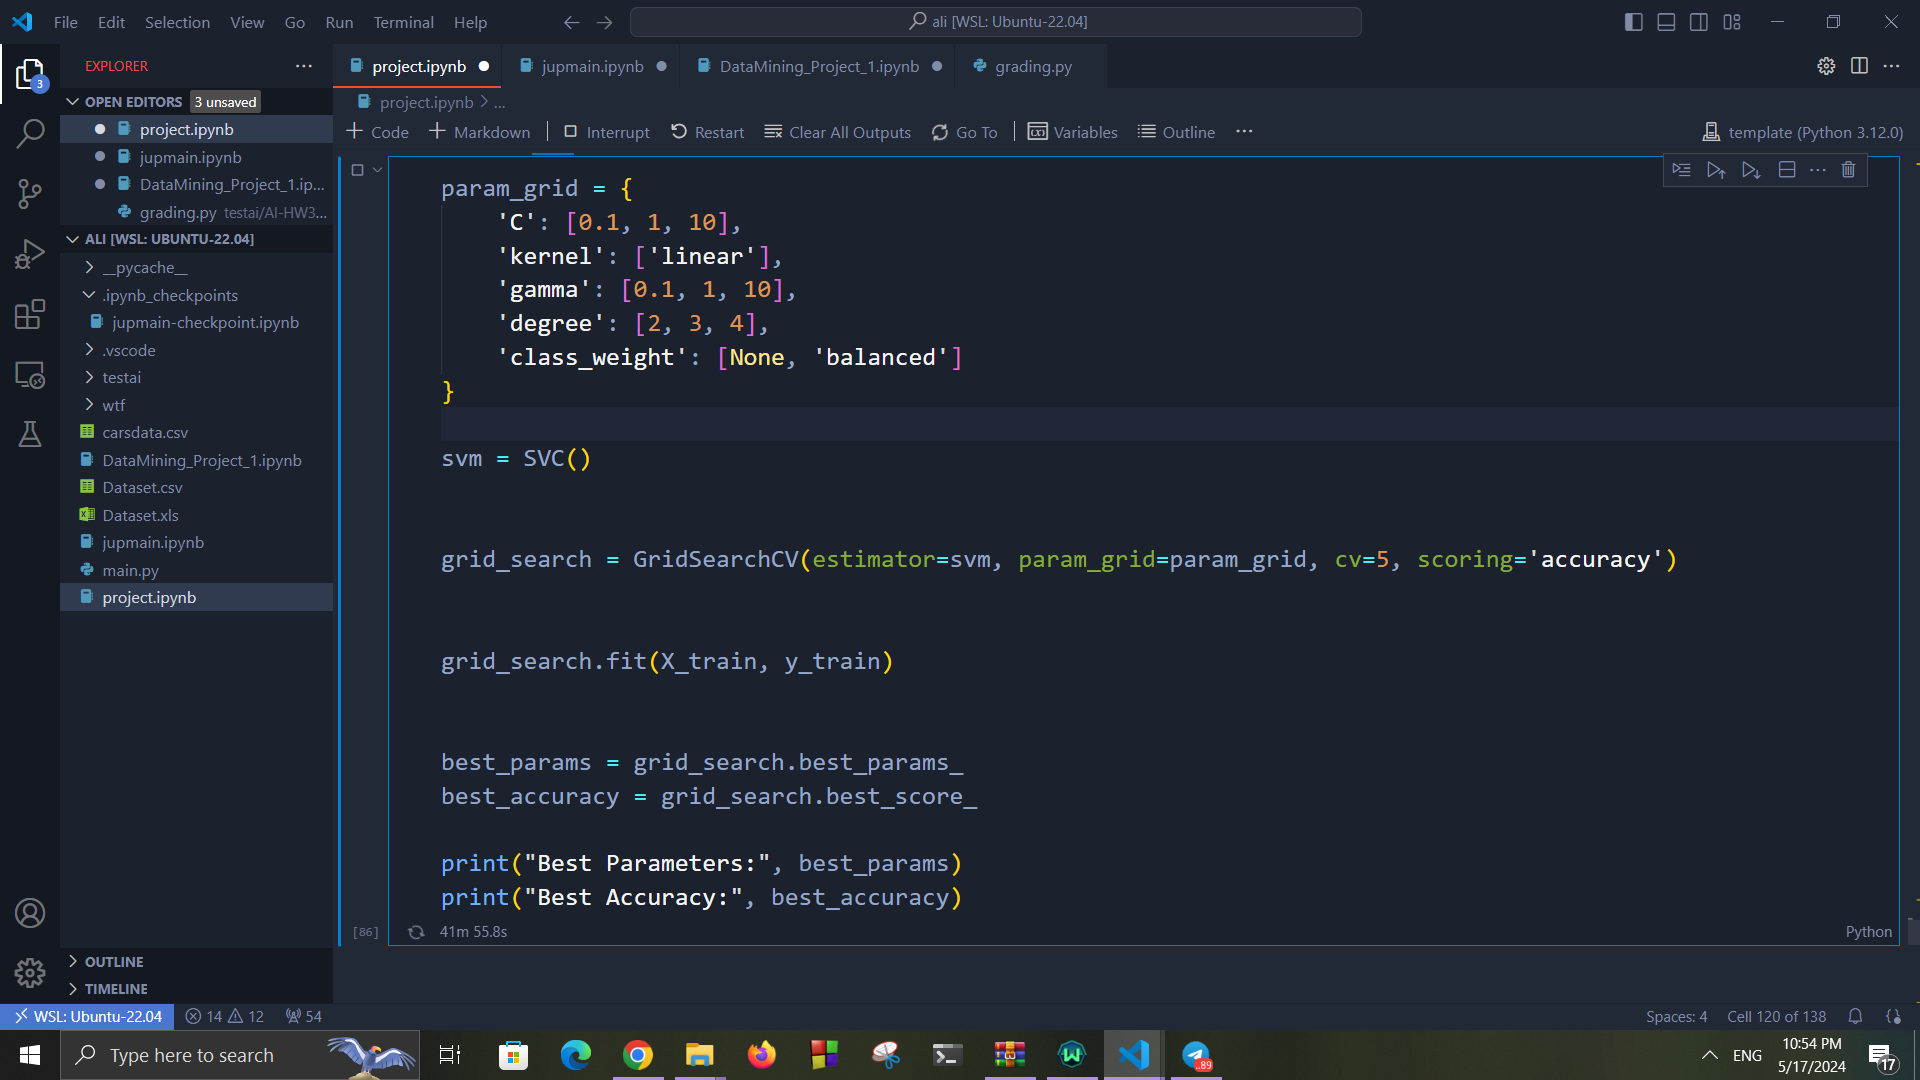

time limit didnt let me to calculate the hyperparams for svm

In [92]:
svm = SVC(kernel='linear')  
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [93]:
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7546177370030581
Precision: 0.7440994772691272
Recall: 0.7712198325398129
F1 Score: 0.7574169622702354


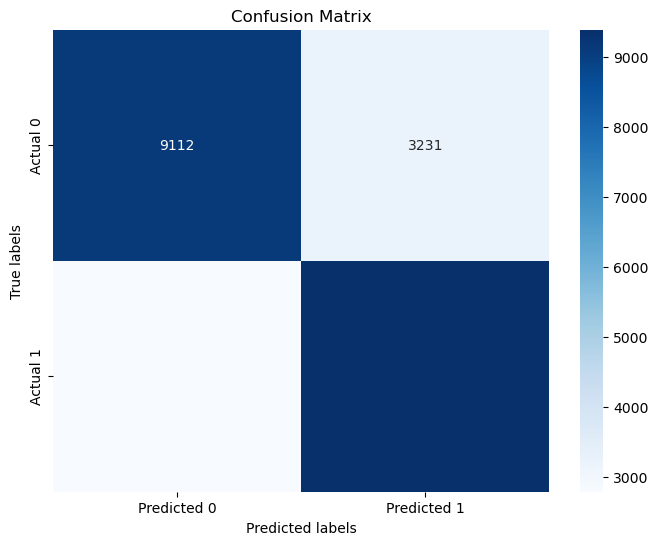

In [94]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

decision tree was better than the others